In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
this data uses pps
'''
baseline_filepath = r'Data/baseline_pps_data.csv'
baseline_df = pd.read_csv(baseline_filepath)
baseline_desc = baseline_df.describe()

In [3]:
'''
this data uses pps
all unrelated processes are on the first core, chrony is on the second and third core, and gpsd is on the fourth and final core
'''
cpuisol_filepath = r'Data/cpuisol_pps_data.csv'
cpuisol_df = pd.read_csv(cpuisol_filepath)
cpuisol_desc = cpuisol_df.describe()

In [4]:
'''
this data uses pps
all unrelated processes are on the first core, chrony is on the second and third core, and gpsd is on the fourth and final core
the cpu is pinned at 1000MHz
'''
cpuisol_1000MHz_filepath = r'Data/cpuisol_1000MHz_pps_data.csv'
cpuisol_1000MHz_df = pd.read_csv(cpuisol_1000MHz_filepath)
cpuisol_1000MHz_desc = cpuisol_1000MHz_df.describe()

In [5]:
'''
this data uses pps
all unrelated processes are on the first core, chrony is on the second and third core, and gpsd is on the fourth and final core
the cpu is pinned at 1800MHz
'''
cpuisol_1800MHz_filepath = r'Data/cpuisol_1800MHz_pps_data.csv'
cpuisol_1800MHz_df = pd.read_csv(cpuisol_1800MHz_filepath)
cpuisol_1800MHz_desc = cpuisol_1800MHz_df.describe()

In [6]:
'''
this data uses pps
this uses the normal scheduler but chrony has its priority elevated (will get scheduled first)
there is no modifications to cpu speed
'''
high_priority_stock_filepath = r'Data/high_priority_stock_pps_data.csv'
high_priority_stock_df = pd.read_csv(high_priority_stock_filepath)
high_priority_stock_desc = high_priority_stock_df.describe()

In [7]:
'''
this data uses pps
this uses the normal scheduler but chrony has its priority elevated (will get scheduled first) and is set to stay in ram
there is no modifications to cpu speed
'''
high_priority_in_ram_stock_filepath = r'Data/high_priority_in_ram_stock_pps_data.csv'
high_priority_in_ram_stock_df = pd.read_csv(high_priority_in_ram_stock_filepath)
high_priority_in_ram_stock_desc = high_priority_in_ram_stock_df.describe()

In [8]:
'''
this data uses pps that is polled nonstop
this uses the normal scheduler but chrony has its priority elevated (will get scheduled first) and is set to stay in ram
there is no modifications to cpu speed
'''
high_priority_in_ram_0poll_stock_filepath = r'Data/high_priority_in_ram_0poll_stock_pps_data.csv'
high_priority_in_ram_0poll_stock_df = pd.read_csv(high_priority_in_ram_0poll_stock_filepath)
high_priority_in_ram_0poll_stock_desc = high_priority_in_ram_0poll_stock_df.describe()

In [9]:
'''
All of the data has the following format and spans 2 hours
'''
baseline_df.iloc[np.r_[0:3, -2:0]]

Date (UTC)      Time (UTC)  IP Address       Std  Est offset  Offset std  \
0    2023-12-11        21:00:00        NMEA  0.001518      0.1275    0.000890   
1    2023-12-11        21:00:08        NMEA  0.001751      0.1261    0.000983   
2    2023-12-11        21:00:16        NMEA  0.002075      0.1271    0.001131   
898  2023-12-11        22:59:51        NMEA  0.001033      0.1363    0.000467   
899  2023-12-11        23:00:01        NMEA  0.001077      0.1361    0.000479   

     Diff freq  Est skew  Stress  Ns  Bs  Nr  Asym  
0    -0.000024  0.000106   0.150  10   0   7   0.0  
1    -0.000045  0.000101   0.200  11   0   7   0.0  
2    -0.000022  0.000100   0.230  12   0   8   0.0  
898  -0.000053  0.000027   0.081  17   0  10   0.0  
899  -0.000049  0.000025   0.160  18   0  11   0.0

### Measurement breakdown
<pre>
Date (UTC)  - The date when the measurement was taken in UTC timezone
Time (UTC)  - The time when the measurement was taken in UTC timezone
IP Address  - The IP related to the measurement, for our purposes we will only be concerned with the NMEA results so they've been extracted
</pre>
#### Smaller values are generally better for the following:
<pre>
Std         - Standard Deviation of all offset values
Est offset  - The estimated clock offset compared to the reference time
Offset std  - Standard Deviation of current offset to the mean
Diff freq   - The estimated frequency difference compared to reference time
Est skew    - Estimated rate at which clock gains or loses time relative to reference clock
Stress      - How well the time synchronization is performing
Ns          - Number of samples not used for synchronization
Bs          - Number of samples that were bad for synchronization
Nr          - Number of times the reference source was not reachable
Asym        - difference in propogation delay betwen up/downstream paths
</pre>

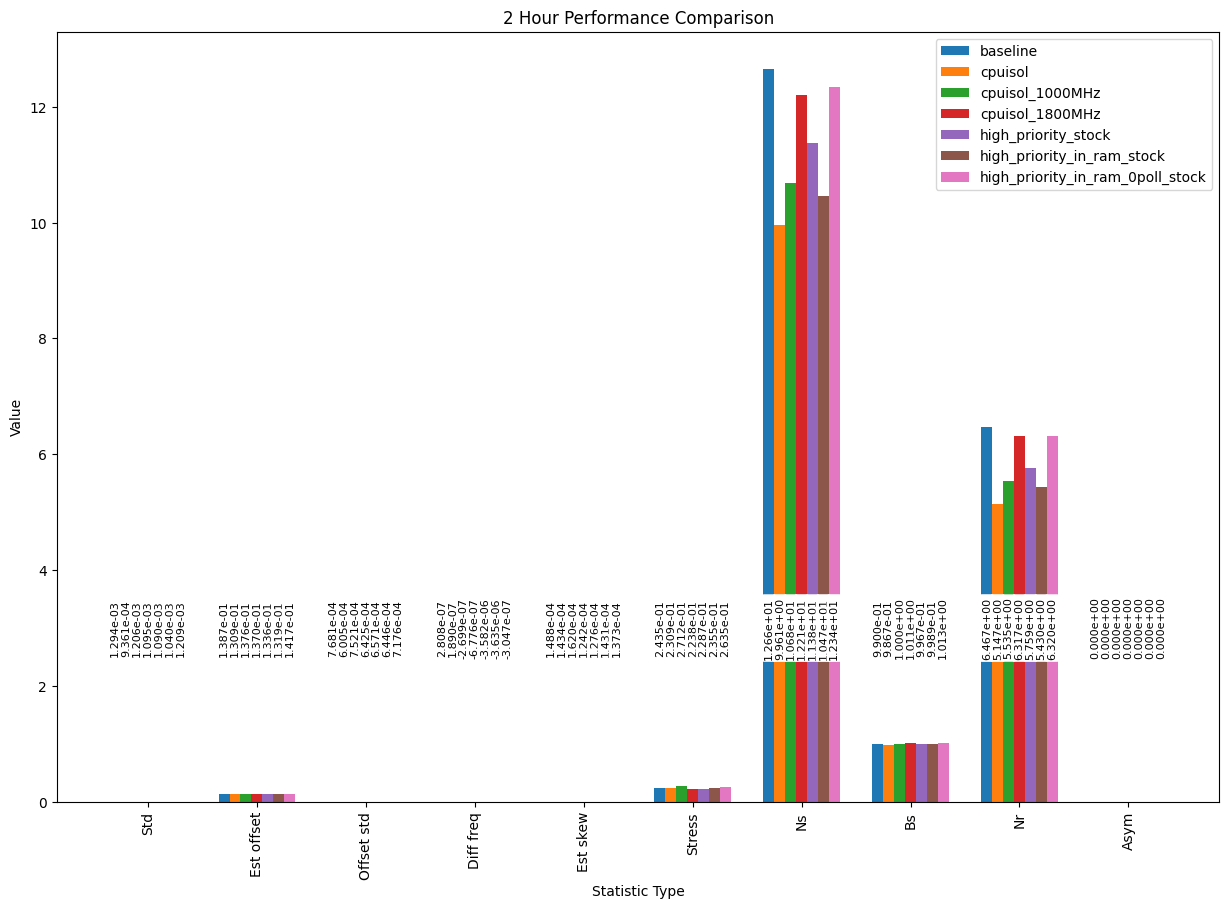

In [10]:
bar_width = 0.1
text_properties = {'size' : 8,
                   'bbox' : { 'boxstyle'    :   'round',
                              'facecolor'   :   'white',
                              'edgecolor'   :   'None',
                              'pad'         :   0.25}}
variations = { 'baseline'                   :   baseline_desc.loc['mean'],
               'cpuisol'                    :   cpuisol_desc.loc['mean'],
               'cpuisol_1000MHz'            :   cpuisol_1000MHz_desc.loc['mean'],
               'cpuisol_1800MHz'            :   cpuisol_1800MHz_desc.loc['mean'],
               'high_priority_stock'        :   high_priority_stock_desc.loc['mean'],
               'high_priority_in_ram_stock' : high_priority_in_ram_stock_desc.loc['mean'],
               'high_priority_in_ram_0poll_stock': high_priority_in_ram_0poll_stock_desc.loc['mean']}

x = np.arange(10)
plt.figure(figsize=(15,10))
for i, variation in enumerate(variations):
    values = variations[variation]
    plt.bar(x + bar_width*i, values, bar_width, label=variation)
    for xval, key in enumerate(values.keys()):
        plt.text(xval+bar_width*i, 3, '{:.3e}'.format(values[key]), text_properties, va='center', ha='center', rotation='vertical')
plt.xticks(x+((len(variations)-1)/2 * bar_width), labels=variations['baseline'].keys(), rotation='vertical')
plt.legend()
plt.title('2 Hour Performance Comparison')
plt.xlabel('Statistic Type')
plt.ylabel('Value')
plt.show()

In [11]:
baseline_desc

Std  Est offset  Offset std     Diff freq    Est skew  \
count  900.000000  900.000000  900.000000  9.000000e+02  900.000000   
mean     0.001294    0.138735    0.000768  2.807783e-07    0.000149   
std      0.000538    0.004799    0.000379  6.390336e-05    0.000154   
min      0.000086    0.125000    0.000058 -3.498000e-04    0.000007   
25%      0.000944    0.135200    0.000505 -2.753750e-05    0.000040   
50%      0.001210    0.138450    0.000701 -6.543000e-07    0.000098   
75%      0.001621    0.141800    0.000915  3.235750e-05    0.000205   
max      0.004445    0.151000    0.003183  2.840000e-04    0.001100   

             Stress          Ns          Bs          Nr   Asym  
count  9.000000e+02  900.000000  900.000000  900.000000  900.0  
mean   2.434982e-01   12.658889    0.990000    6.466667    0.0  
std    5.951898e-01    6.895879    2.659152    3.452200    0.0  
min    1.700000e-11    7.000000    0.000000    3.000000    0.0  
25%    4.600000e-02    8.000000    0.000000    4.000000    0.0  
50%    1.100000e-01   10.000000    0.000000    5.000000    0.0  
75%    2.100000e-01   15.000000    1.000000    8.000000    0.0  
max    9.900000e+00   38.000000   30.000000   19.000000    0.0

In [12]:
cpuisol_desc

Std  Est offset  Offset std     Diff freq    Est skew  \
count  901.000000  901.000000  901.000000  9.010000e+02  901.000000   
mean     0.000936    0.130891    0.000601  1.890250e-07    0.000143   
std      0.000399    0.004444    0.000282  5.687224e-05    0.000114   
min      0.000130    0.118800    0.000094 -2.018000e-04    0.000006   
25%      0.000658    0.127400    0.000400 -3.197000e-05    0.000054   
50%      0.000877    0.131200    0.000539 -3.226000e-06    0.000111   
75%      0.001132    0.134400    0.000736  3.212000e-05    0.000199   
max      0.002588    0.141700    0.002410  1.791000e-04    0.000700   

             Stress          Ns          Bs          Nr   Asym  
count  9.010000e+02  901.000000  901.000000  901.000000  901.0  
mean   2.308820e-01    9.961154    0.986681    5.146504    0.0  
std    4.559633e-01    4.567718    2.060162    2.465464    0.0  
min    3.300000e-10    7.000000    0.000000    3.000000    0.0  
25%    5.000000e-02    7.000000    0.000000    3.000000    0.0  
50%    1.100000e-01    8.000000    0.000000    5.000000    0.0  
75%    2.300000e-01   11.000000    1.000000    6.000000    0.0  
max    6.500000e+00   38.000000   32.000000   19.000000    0.0

In [13]:
cpuisol_1000MHz_desc

Std  Est offset  Offset std     Diff freq    Est skew  \
count  901.000000  901.000000  901.000000  9.010000e+02  901.000000   
mean     0.001206    0.137585    0.000752 -2.698696e-07    0.000162   
std      0.000534    0.004895    0.000362  6.843698e-05    0.000147   
min      0.000146    0.125700    0.000104 -2.248000e-04    0.000012   
25%      0.000817    0.133700    0.000474 -3.999000e-05    0.000052   
50%      0.001125    0.138100    0.000683 -1.419000e-06    0.000111   
75%      0.001551    0.141200    0.000962  3.636000e-05    0.000228   
max      0.003536    0.150800    0.002531  2.959000e-04    0.000922   

             Stress          Ns          Bs          Nr   Asym  
count  9.010000e+02  901.000000  901.000000  901.000000  901.0  
mean   2.711914e-01   10.678135    1.000000    5.534961    0.0  
std    6.060991e-01    4.259716    2.253393    2.245526    0.0  
min    1.100000e-09    7.000000    0.000000    3.000000    0.0  
25%    4.900000e-02    7.000000    0.000000    4.000000    0.0  
50%    1.100000e-01    9.000000    0.000000    5.000000    0.0  
75%    2.300000e-01   13.000000    1.000000    7.000000    0.0  
max    9.100000e+00   29.000000   19.000000   12.000000    0.0

In [14]:
cpuisol_1800MHz_desc

Std  Est offset  Offset std     Diff freq    Est skew  \
count  900.000000  900.000000  900.000000  9.000000e+02  900.000000   
mean     0.001095    0.137019    0.000642 -6.776083e-07    0.000124   
std      0.000420    0.002922    0.000270  5.328137e-05    0.000122   
min      0.000204    0.126800    0.000150 -2.321000e-04    0.000009   
25%      0.000794    0.134900    0.000468 -2.822500e-05    0.000038   
50%      0.001087    0.137000    0.000577 -3.083000e-06    0.000076   
75%      0.001346    0.139125    0.000793  2.166250e-05    0.000170   
max      0.002648    0.144100    0.001944  2.232000e-04    0.000686   

             Stress          Ns          Bs          Nr   Asym  
count  9.000000e+02  900.000000  900.000000  900.000000  900.0  
mean   2.238347e-01   12.207778    1.011111    6.316667    0.0  
std    4.159292e-01    6.349143    2.395279    3.168735    0.0  
min    3.600000e-10    7.000000    0.000000    3.000000    0.0  
25%    4.500000e-02    7.000000    0.000000    4.000000    0.0  
50%    1.100000e-01   10.000000    0.000000    5.000000    0.0  
75%    2.125000e-01   14.000000    1.000000    8.000000    0.0  
max    4.000000e+00   40.000000   21.000000   22.000000    0.0

In [15]:
high_priority_stock_desc

Std  Est offset  Offset std   Diff freq    Est skew  \
count  901.000000  901.000000  901.000000  901.000000  901.000000   
mean     0.001090    0.133553    0.000657   -0.000004    0.000128   
std      0.000467    0.004404    0.000306    0.000054    0.000115   
min      0.000113    0.120000    0.000100   -0.000221    0.000010   
25%      0.000775    0.131300    0.000446   -0.000027    0.000044   
50%      0.001039    0.134500    0.000594   -0.000002    0.000090   
75%      0.001335    0.136900    0.000799    0.000020    0.000175   
max      0.003320    0.145400    0.002077    0.000283    0.000729   

             Stress          Ns          Bs          Nr   Asym  
count  9.010000e+02  901.000000  901.000000  901.000000  901.0  
mean   2.286728e-01   11.377358    0.996670    5.759156    0.0  
std    4.423440e-01    4.826282    2.176386    2.389499    0.0  
min    1.000000e-09    7.000000    0.000000    3.000000    0.0  
25%    4.700000e-02    7.000000    0.000000    4.000000    0.0  
50%    1.100000e-01   10.000000    0.000000    5.000000    0.0  
75%    2.200000e-01   14.000000    1.000000    7.000000    0.0  
max    5.800000e+00   31.000000   19.000000   15.000000    0.0

In [16]:
high_priority_in_ram_stock_desc

Std  Est offset  Offset std   Diff freq    Est skew  \
count  901.000000  901.000000  901.000000  901.000000  901.000000   
mean     0.001040    0.131911    0.000645   -0.000004    0.000143   
std      0.000406    0.002617    0.000259    0.000057    0.000114   
min      0.000099    0.125600    0.000072   -0.000184    0.000009   
25%      0.000745    0.130100    0.000468   -0.000039    0.000057   
50%      0.001022    0.131500    0.000611   -0.000007    0.000108   
75%      0.001308    0.133800    0.000772    0.000028    0.000202   
max      0.002569    0.139100    0.001775    0.000209    0.000633   

             Stress          Ns         Bs          Nr   Asym  
count  9.010000e+02  901.000000  901.00000  901.000000  901.0  
mean   2.354597e-01   10.466149    0.99889    5.429523    0.0  
std    4.628003e-01    5.014005    2.16256    2.708992    0.0  
min    1.800000e-09    7.000000    0.00000    3.000000    0.0  
25%    5.000000e-02    7.000000    0.00000    3.000000    0.0  
50%    1.200000e-01    9.000000    0.00000    5.000000    0.0  
75%    2.300000e-01   12.000000    1.00000    7.000000    0.0  
max    5.700000e+00   41.000000   30.00000   21.000000    0.0

In [17]:
high_priority_in_ram_0poll_stock_desc

Std  Est offset  Offset std     Diff freq    Est skew  \
count  900.000000  900.000000  900.000000  9.000000e+02  900.000000   
mean     0.001209    0.141711    0.000718 -3.046601e-07    0.000137   
std      0.000498    0.003024    0.000341  6.556596e-05    0.000138   
min      0.000173    0.132300    0.000117 -2.642000e-04    0.000007   
25%      0.000875    0.139500    0.000480 -2.665500e-05    0.000040   
50%      0.001178    0.141600    0.000668 -3.174500e-06    0.000088   
75%      0.001462    0.143700    0.000870  2.836000e-05    0.000186   
max      0.003748    0.149800    0.002404  3.008000e-04    0.000800   

             Stress          Ns          Bs          Nr   Asym  
count  9.000000e+02  900.000000  900.000000  900.000000  900.0  
mean   2.635419e-01   12.344444    1.013333    6.320000    0.0  
std    6.592048e-01    5.912339    2.666448    2.960594    0.0  
min    1.100000e-10    7.000000    0.000000    3.000000    0.0  
25%    4.000000e-02    8.000000    0.000000    4.000000    0.0  
50%    1.100000e-01   10.000000    0.000000    6.000000    0.0  
75%    2.200000e-01   15.000000    1.000000    8.000000    0.0  
max    8.900000e+00   35.000000   27.000000   17.000000    0.0